## Problem Statement

This project is to find the credit card transaction made is fraud or not using the given data

## Importing the Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [87]:
df_train = pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset/fraudTrain.csv')
df_test = pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset/fraudTest.csv')

In [88]:
df = pd.concat([df_train, df_test], ignore_index=True, sort=False)

In [89]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


#### Shape of the Dataset

In [90]:
df.shape

(1852394, 23)

## Data Checks to perform

### Checking Missing Value

In [91]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

There is no null values(missing values) in the dataset

### Check for duplicates

In [92]:
df.duplicated().sum()

0

There is no duplicate values as well

### Check for Datatypes

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

### Check for number of unique values in each column

In [94]:
df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

### Check for Statistics of Dataset

In [95]:
df[['amt', 'city_pop']].describe()

,amt,city_pop
count,1.852394e+06,1.852394e+06
mean,7.006357e+01,8.864367e+04
std,1.592540e+02,3.014876e+05
min,1.000000e+00,2.300000e+01
25%,9.640000e+00,7.410000e+02
50%,4.745000e+01,2.443000e+03
75%,8.310000e+01,2.032800e+04
max,2.894890e+04,2.906700e+06


### Exploring dataset

In [96]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [97]:
df.columns


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [98]:
import plotly.express as px

labels=["Genuine","Fraud"]

fraud_or_not = df["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=df['is_fraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

The dataset is highly imbalanced with 99.5% as Genuine

In [99]:
print('Genuine:', round(df['is_fraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds:', round(df['is_fraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Genuine: 99.48 % of the dataset
Frauds: 0.52 % of the dataset


***So we should not use accuracy as an metric it will be usually high and misleading***

## Outlier Handling

In [100]:
import pandas as pd

# Select numerical columns
numerical_cols = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

# Calculate IQR and identify outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}: {len(outliers)}")


Outliers in amt: 95054
Outliers in lat: 6612
Outliers in long: 71026
Outliers in city_pop: 346191
Outliers in merch_lat: 7063
Outliers in merch_long: 59972


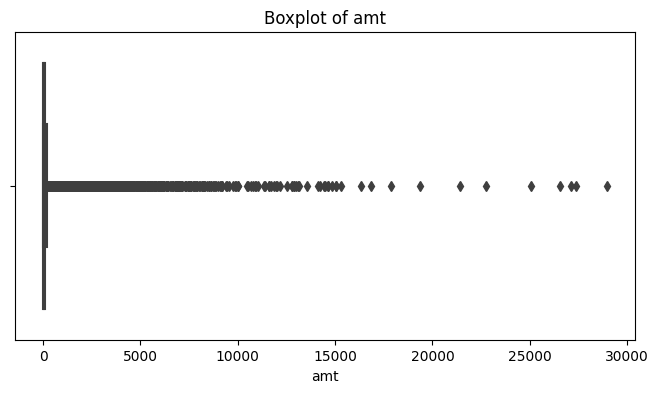

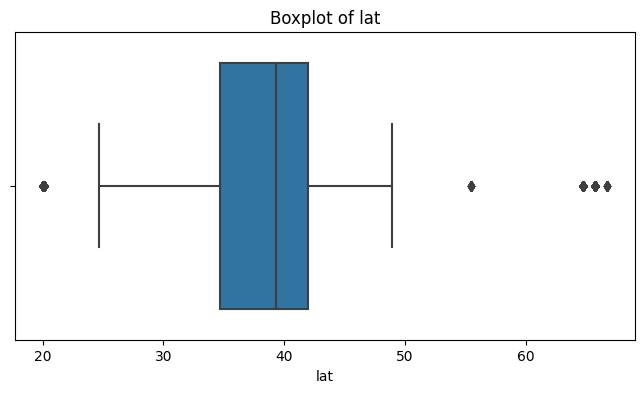

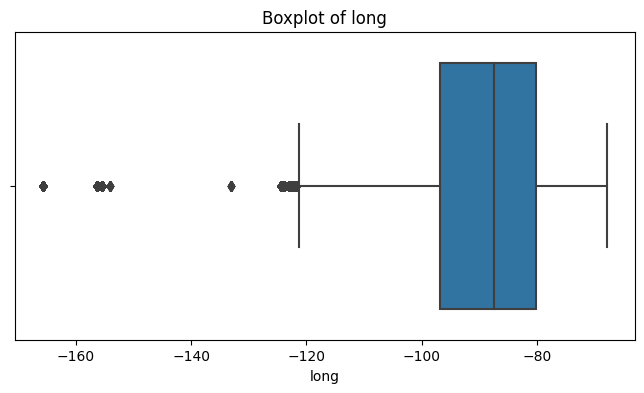

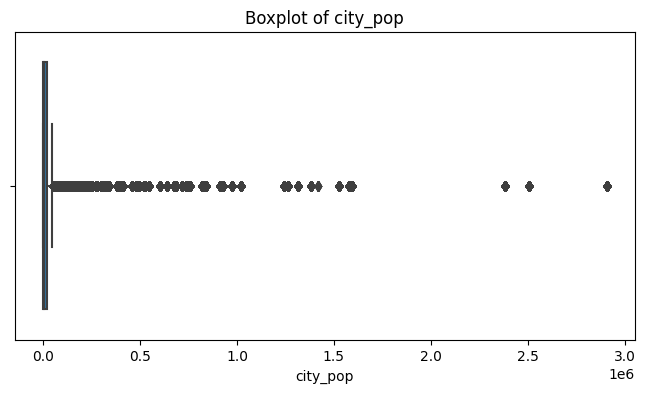

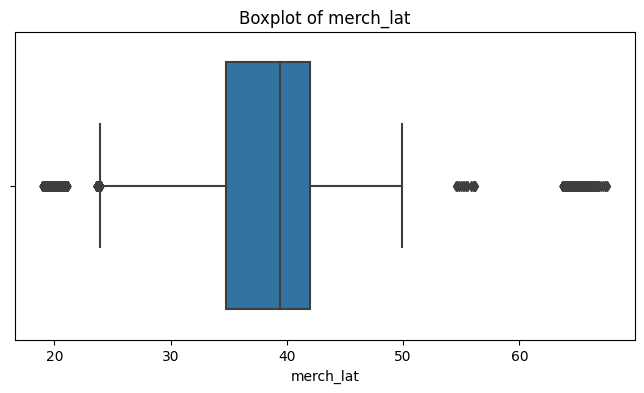

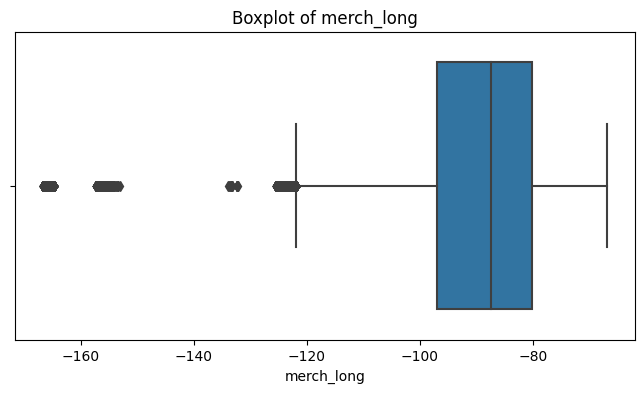

In [101]:
# Boxplot for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [102]:
import pandas as pd

# Make a copy of the original dataset
df_copy = df.copy()

In [103]:
def remove_outliers(df, columns):
    df_no_outliers = df.copy()  # Work on a copy
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1                # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]
    return df_no_outliers


In [104]:
# List of numerical columns to check
numerical_cols = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

# Remove outliers
df_no_outliers = remove_outliers(df_copy, numerical_cols)

print(f"Original dataset size: {df_copy.shape}")
print(f"Dataset size after removing outliers: {df_no_outliers.shape}")


Original dataset size: (1852394, 23)
Dataset size after removing outliers: (1384195, 23)


In [105]:
# Percentage of data retained
data_loss = 100 * (1 - len(df_no_outliers) / len(df_copy))
print(f"Data loss after outlier removal: {data_loss:.2f}%")

Data loss after outlier removal: 25.28%


In [106]:
is_fraud_no_out = df_no_outliers['is_fraud'].value_counts()[1]
is_fraud_with_out = df_copy['is_fraud'].value_counts()[1]

print(f"No. of fraud before outlier removal: {is_fraud_with_out}")
print(f"No. of fraud after outlier removal: {is_fraud_no_out}")

No. of fraud before outlier removal: 9651
No. of fraud after outlier removal: 1865


***As we can see we lost a very large amount of fraud data by outlier detection so we avoid outlier removal***

## Data Preprocessing

In [107]:
# Convert to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract features from the timestamp
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['transaction_day'] = df['trans_date_trans_time'].dt.day
df['transaction_month'] = df['trans_date_trans_time'].dt.month

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 26 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   trans_date_trans_time  datetime64[ns]
 2   cc_num                 int64         
 3   merchant               object        
 4   category               object        
 5   amt                    float64       
 6   first                  object        
 7   last                   object        
 8   gender                 object        
 9   street                 object        
 10  city                   object        
 11  state                  object        
 12  zip                    int64         
 13  lat                    float64       
 14  long                   float64       
 15  city_pop               int64         
 16  job                    object        
 17  dob                    object        
 18  trans_num             

In [109]:
#Lets calculate age from DOB
import pandas as pd
from datetime import datetime

# Ensure dob and transaction date are in datetime format
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')

# Calculate age at the time of transaction
df['age_at_transaction'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365

# Check the new column
print(df[['dob', 'trans_date_trans_time', 'age_at_transaction']].head())


         dob trans_date_trans_time  age_at_transaction
0 1988-03-09   2019-01-01 00:00:18                  30
1 1978-06-21   2019-01-01 00:00:44                  40
2 1962-01-19   2019-01-01 00:00:51                  56
3 1967-01-12   2019-01-01 00:01:16                  52
4 1986-03-28   2019-01-01 00:03:06                  32


In [110]:
#now lets drop those columns
df.drop(['dob', 'trans_date_trans_time'], axis=1, inplace=True)

In [111]:
df.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,transaction_hour,transaction_day,transaction_month,age_at_transaction
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1,1,30
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,1,40
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1,1,56
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1,1,52
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1,1,32


**Features that can be dropped:**

Unnamed: 0 – This is likely just an index and provides no predictive value.

cc_num – Credit card number is a unique identifier for each card and doesn’t help in predicting fraud.

first and last – Names are non-informative and privacy-sensitive.

street – Too specific and not useful for generalizing fraud detection.

trans_num – Transaction ID is a unique identifier and holds no useful information.

unix_time – Redundant if you already have trans_date_trans_time.

merchant_lat and merchant_long – the raw coordinates themselves might not be helpful directly. Drop them if you are not doing geospatial analysis.

In [112]:
df.drop(['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'], axis=1, inplace=True)

In [113]:
df.nunique()

merchant                693
category                 14
amt                   60616
gender                    2
city                    906
state                    51
zip                     985
lat                     983
long                    983
city_pop                891
job                     497
is_fraud                  2
transaction_hour         24
transaction_day          31
transaction_month        12
age_at_transaction       84
dtype: int64

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   merchant            object 
 1   category            object 
 2   amt                 float64
 3   gender              object 
 4   city                object 
 5   state               object 
 6   zip                 int64  
 7   lat                 float64
 8   long                float64
 9   city_pop            int64  
 10  job                 object 
 11  is_fraud            int64  
 12  transaction_hour    int32  
 13  transaction_day     int32  
 14  transaction_month   int32  
 15  age_at_transaction  int64  
dtypes: float64(3), int32(3), int64(4), object(6)
memory usage: 204.9+ MB


In [115]:
df.nunique()

merchant                693
category                 14
amt                   60616
gender                    2
city                    906
state                    51
zip                     985
lat                     983
long                    983
city_pop                891
job                     497
is_fraud                  2
transaction_hour         24
transaction_day          31
transaction_month        12
age_at_transaction       84
dtype: int64

In [116]:
#Lets encode the categorical data
#Lets use frequency encoding since the some object data has high number of category
# Frequency encoding for high-cardinality categorical features
for col in ['merchant', 'city', 'job']:
    freq_map = df[col].value_counts().to_dict()
    df[col + '_freq'] = df[col].map(freq_map)

df.drop(['merchant', 'city', 'job'], axis=1, inplace=True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   category            object 
 1   amt                 float64
 2   gender              object 
 3   state               object 
 4   zip                 int64  
 5   lat                 float64
 6   long                float64
 7   city_pop            int64  
 8   is_fraud            int64  
 9   transaction_hour    int32  
 10  transaction_day     int32  
 11  transaction_month   int32  
 12  age_at_transaction  int64  
 13  merchant_freq       int64  
 14  city_freq           int64  
 15  job_freq            int64  
dtypes: float64(3), int32(3), int64(7), object(3)
memory usage: 204.9+ MB


In [118]:
# Use one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['category','gender', 'state'], drop_first=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 77 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   zip                      int64  
 2   lat                      float64
 3   long                     float64
 4   city_pop                 int64  
 5   is_fraud                 int64  
 6   transaction_hour         int32  
 7   transaction_day          int32  
 8   transaction_month        int32  
 9   age_at_transaction       int64  
 10  merchant_freq            int64  
 11  city_freq                int64  
 12  job_freq                 int64  
 13  category_food_dining     bool   
 14  category_gas_transport   bool   
 15  category_grocery_net     bool   
 16  category_grocery_pos     bool   
 17  category_health_fitness  bool   
 18  category_home            bool   
 19  category_kids_pets       bool   
 20  category_misc_net        bool   
 21  category

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# Separate features and target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


We used stratify method to split the dataset

In [121]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Lets apply smote for oversampling since the dataset is imbalanced

In [122]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [123]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))

In [124]:
# Logistic Regression
print("\nLogistic Regression")
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_smote, y_train_smote)
evaluate_model(lr, X_test, y_test)


Logistic Regression
Accuracy: 0.8907
ROC-AUC: 0.9214
              precision    recall  f1-score   support

           0       1.00      0.89      0.94    552824
           1       0.04      0.79      0.07      2895

    accuracy                           0.89    555719
   macro avg       0.52      0.84      0.51    555719
weighted avg       0.99      0.89      0.94    555719



In [125]:
# Random Forest
print("\nRandom Forest")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smote, y_train_smote)
evaluate_model(rf, X_test, y_test)


Random Forest
Accuracy: 0.9986
ROC-AUC: 0.9944
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.91      0.81      0.85      2895

    accuracy                           1.00    555719
   macro avg       0.95      0.90      0.93    555719
weighted avg       1.00      1.00      1.00    555719



In [126]:
# XGBoost
print("\nXGBoost")
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_smote, y_train_smote)
evaluate_model(xgb, X_test, y_test)


XGBoost
Accuracy: 0.9982
ROC-AUC: 0.9984
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.80      0.88      0.84      2895

    accuracy                           1.00    555719
   macro avg       0.90      0.94      0.92    555719
weighted avg       1.00      1.00      1.00    555719

